In [55]:
using GeoStats

In [56]:
?GeoDataFrame

search: GeoDataFrame



```
GeoDataFrame(data, coordnames)
```

A dataframe object `data` with additional metadata for tracking the columns `coordnames` that represent spatial coordinates.

## Examples

If the data was already loaded in a normal DataFrame `data`, and there exists columns named `x`, `y` and `z`, wrap the data and specify the column names:

```julia
julia> GeoDataFrame(data, [:x,:y,:z])
```

Alternatively, load the data directly into a `GeoDataFrame` object by using the method [`readgeotable`](@ref).

### Notes

This type is a lightweight wrapper over Julia's DataFrame types. No additional storage is required other than a vector of symbols with the columns names representing spatial coordinates.


In [57]:
using CSV

In [58]:
x_prime_df=CSV.read("x_shuffled.csv",header=0)
y_prime_df=CSV.read("y_shuffled.csv", header=0)

,Column1
,Float64
1,2.64432e5
2,1.67688e5
3,6.70549e5
4,1.1592e5
5,6.93351e5
6,5.5556e5
7,188443.0
8,1.96863e5
9,4.8118e5


In [60]:
x_prime_df[:result]=y_prime_df[:Column1]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[60]:1
└ @ Core In[60]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[60]:1
└ @ Core In[60]:1


400-element CSV.Column{Float64,Float64}:
 264432.25520764623       
 167688.41183851557       
 670549.1309412513        
 115919.8530580652        
 693350.508694783         
 555560.1098441511        
 188442.96715840694       
 196862.60159301193       
 481180.30510619          
 853647.0166223499        
 580936.4451294354        
 480871.4034428356        
 855955.6781931772        
      ⋮                   
 534234.1675322347        
 549584.2680083631        
 397004.1057001574        
 410824.6893967921        
 102427.80128575808       
 317454.0032188951        
 432703.8716610953        
 207019.8774613448        
      1.1939538005072905e6
 586269.1259098226        
 786013.4761361814        
 859230.0453506851        

In [61]:
function normalize(dataframe)
    df=dataframe
    for name in names(dataframe[1:15])
        df[name] = dataframe[name].-minimum(dataframe[name])
        df[name] = df[name]./maximum(df[name])
    end
    return df
end
    

normalize (generic function with 1 method)

In [62]:
x_prime_norm=normalize(x_prime_df)

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = normalize(::DataFrame) at In[61]:3
└ @ Main ./In[61]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = normalize(::DataFrame) at In[61]:4
└ @ Main ./In[61]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = normalize(::DataFrame) at In[61]:4
└ @ Main ./In[61]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = normalize(::DataFrame) at In[61]:4
└ @ Main ./In[61]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = normalize(::DataFrame) at In[61]:5
└ @ Main ./In[61]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is dep

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.325524,0.950538,0.357411,0.389105,0.194585,0.184043,0.237166,0.485226
2,0.652948,0.704087,0.861773,0.837654,0.434892,0.379896,0.744429,0.225178
3,0.290786,0.383286,0.833265,0.9898,0.638877,0.0566432,0.936918,0.222246
4,0.749271,0.479017,0.0575158,0.904464,0.506446,0.166152,0.47365,0.285476
5,0.60662,0.653666,0.589511,0.0862952,0.499406,0.199111,0.0911868,0.151885
6,0.657132,0.329131,0.215921,0.33697,0.326447,0.371088,0.521115,0.341996
7,0.287145,0.397668,0.518124,0.920083,0.448945,0.527357,0.81018,0.539941
8,0.677486,0.642819,0.279754,0.225433,0.128728,0.543143,0.903321,0.528444
9,0.482049,0.555148,0.955058,0.503599,0.50785,0.411249,0.702991,0.805342


In [63]:
gdata=GeoDataFrame(x_prime_df, [:Column1,:Column2,:Column3,:Column4,:Column5,:Column6,:Column7,:Column8,:Column9,:Column10,:Column11,:Column12,:Column13,:Column14,:Column15])

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.325524,0.950538,0.357411,0.389105,0.194585,0.184043,0.237166,0.485226
2,0.652948,0.704087,0.861773,0.837654,0.434892,0.379896,0.744429,0.225178
3,0.290786,0.383286,0.833265,0.9898,0.638877,0.0566432,0.936918,0.222246
4,0.749271,0.479017,0.0575158,0.904464,0.506446,0.166152,0.47365,0.285476
5,0.60662,0.653666,0.589511,0.0862952,0.499406,0.199111,0.0911868,0.151885
6,0.657132,0.329131,0.215921,0.33697,0.326447,0.371088,0.521115,0.341996
7,0.287145,0.397668,0.518124,0.920083,0.448945,0.527357,0.81018,0.539941
8,0.677486,0.642819,0.279754,0.225433,0.128728,0.543143,0.903321,0.528444
9,0.482049,0.555148,0.955058,0.503599,0.50785,0.411249,0.702991,0.805342


In [64]:
gdata_norm=GeoDataFrame(x_prime_norm, [:Column1,:Column2,:Column3,:Column4,:Column5,:Column6,:Column7,:Column8,:Column9,:Column10,:Column11,:Column12,:Column13,:Column14,:Column15])

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.325524,0.950538,0.357411,0.389105,0.194585,0.184043,0.237166,0.485226
2,0.652948,0.704087,0.861773,0.837654,0.434892,0.379896,0.744429,0.225178
3,0.290786,0.383286,0.833265,0.9898,0.638877,0.0566432,0.936918,0.222246
4,0.749271,0.479017,0.0575158,0.904464,0.506446,0.166152,0.47365,0.285476
5,0.60662,0.653666,0.589511,0.0862952,0.499406,0.199111,0.0911868,0.151885
6,0.657132,0.329131,0.215921,0.33697,0.326447,0.371088,0.521115,0.341996
7,0.287145,0.397668,0.518124,0.920083,0.448945,0.527357,0.81018,0.539941
8,0.677486,0.642819,0.279754,0.225433,0.128728,0.543143,0.903321,0.528444
9,0.482049,0.555148,0.955058,0.503599,0.50785,0.411249,0.702991,0.805342


In [65]:
gdata_inp=GeoDataFrame(gdata.data[1:300,:], [:Column1,:Column2,:Column3,:Column4,:Column5,:Column6,:Column7,:Column8,:Column9,:Column10,:Column11,:Column12,:Column13,:Column14,:Column15])

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.325524,0.950538,0.357411,0.389105,0.194585,0.184043,0.237166,0.485226
2,0.652948,0.704087,0.861773,0.837654,0.434892,0.379896,0.744429,0.225178
3,0.290786,0.383286,0.833265,0.9898,0.638877,0.0566432,0.936918,0.222246
4,0.749271,0.479017,0.0575158,0.904464,0.506446,0.166152,0.47365,0.285476
5,0.60662,0.653666,0.589511,0.0862952,0.499406,0.199111,0.0911868,0.151885
6,0.657132,0.329131,0.215921,0.33697,0.326447,0.371088,0.521115,0.341996
7,0.287145,0.397668,0.518124,0.920083,0.448945,0.527357,0.81018,0.539941
8,0.677486,0.642819,0.279754,0.225433,0.128728,0.543143,0.903321,0.528444
9,0.482049,0.555148,0.955058,0.503599,0.50785,0.411249,0.702991,0.805342


In [66]:
gdata_inp_norm=GeoDataFrame(gdata_norm.data[1:300,:], [:Column1,:Column2,:Column3,:Column4,:Column5,:Column6,:Column7,:Column8,:Column9,:Column10,:Column11,:Column12,:Column13,:Column14,:Column15])

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.325524,0.950538,0.357411,0.389105,0.194585,0.184043,0.237166,0.485226
2,0.652948,0.704087,0.861773,0.837654,0.434892,0.379896,0.744429,0.225178
3,0.290786,0.383286,0.833265,0.9898,0.638877,0.0566432,0.936918,0.222246
4,0.749271,0.479017,0.0575158,0.904464,0.506446,0.166152,0.47365,0.285476
5,0.60662,0.653666,0.589511,0.0862952,0.499406,0.199111,0.0911868,0.151885
6,0.657132,0.329131,0.215921,0.33697,0.326447,0.371088,0.521115,0.341996
7,0.287145,0.397668,0.518124,0.920083,0.448945,0.527357,0.81018,0.539941
8,0.677486,0.642819,0.279754,0.225433,0.128728,0.543143,0.903321,0.528444
9,0.482049,0.555148,0.955058,0.503599,0.50785,0.411249,0.702991,0.805342


In [67]:
punktmenge=PointSet(adjoint(convert(Matrix,gdata.data[1:15])))

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[67]:1
└ @ Core In[67]:1


15×400 PointSet{Float64,15}
 0.32552403347646375  0.6529483865181551   …  0.45664549343797745
 0.9505377745130067   0.7040874262043197      0.5156778250078524 
 0.3574106632505416   0.8617731659535054      0.8888279236974739 
 0.3891053083039686   0.8376543520911649      0.10413054268723793
 0.19458481981610914  0.43489205441952716     0.31057324901305994
 0.18404287745283546  0.37989580450756727  …  0.436042599165575  
 0.237165948950443    0.7444293249953049      0.42231367109377316
 0.4852260601904668   0.22517765935529105     0.4680305411114972 
 0.595528233074592    0.4691692339893906      0.8083230780587582 
 0.547243978939568    0.40116585813571554     0.5123150835953532 
 0.654956161767441    0.35634982808567617  …  0.35297594406155686
 0.9172940522512507   0.3468949416342412      0.8214274596998332 
 0.6162868767048066   0.6317078206990341      0.41522867698057586
 0.3051309124852714   0.6605609879263646      0.6320678204716216 
 0.1656567562494625   0.5184792443786393      0.

In [68]:
punktmenge_norm=PointSet(adjoint(convert(Matrix,gdata_norm.data[1:15])))

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[68]:1
└ @ Core In[68]:1


15×400 PointSet{Float64,15}
 0.32552403347646375  0.6529483865181551   …  0.45664549343797745
 0.9505377745130067   0.7040874262043197      0.5156778250078524 
 0.3574106632505416   0.8617731659535054      0.8888279236974739 
 0.3891053083039686   0.8376543520911649      0.10413054268723793
 0.19458481981610914  0.43489205441952716     0.31057324901305994
 0.18404287745283546  0.37989580450756727  …  0.436042599165575  
 0.237165948950443    0.7444293249953049      0.42231367109377316
 0.4852260601904668   0.22517765935529105     0.4680305411114972 
 0.595528233074592    0.4691692339893906      0.8083230780587582 
 0.547243978939568    0.40116585813571554     0.5123150835953532 
 0.654956161767441    0.35634982808567617  …  0.35297594406155686
 0.9172940522512507   0.3468949416342412      0.8214274596998332 
 0.6162868767048066   0.6317078206990341      0.41522867698057586
 0.3051309124852714   0.6605609879263646      0.6320678204716216 
 0.1656567562494625   0.5184792443786393      0.

In [69]:
problem = EstimationProblem(gdata_inp_norm, punktmenge_norm, :result)

15D EstimationProblem
  data:      300×16 GeoDataFrame (Column1, Column2, Column3, Column4, Column5, Column6, Column7, Column8, Column9, Column10, Column11, Column12, Column13, Column14 and Column15)
  domain:    15×400 PointSet{Float64,15}
  variables: result (Float64)

In [70]:
solver = Kriging(
    :result => (variogram=GaussianVariogram(range=15.),)
)


Kriging
  └─result
    └─variogram ⇨ GaussianVariogram{Float64,Euclidean}(15.0, 1.0, 1.0e-6, Euclidean(0.0))
    └─distance ⇨ Euclidean(0.0)


In [71]:
solution = solve(problem, solver)

15D EstimationSolution
  domain: 15×400 PointSet{Float64,15}
  variables: result

In [72]:
μ, σ² = solution[:result]

(mean = [264432.25520764623, 167688.4118280789, 670549.1309356502, 115919.85301286125, 693350.5086835421, 555560.1098407966, 188442.96721043056, 196862.60159517988, 481180.30516838375, 853647.0165697729  …  318529.79217096494, 575119.3679956301, 250075.80293832783, 158582.42857505963, 179825.4250687761, 205990.5938549889, 1.1630688854629614e6, 152395.53377238114, 656454.90115045, 1.214454696679952e6], variance = [0.0, -6.661338147750939e-16, -6.661338147750939e-16, 1.1102230246251565e-16, 0.0, -2.220446049250313e-16, -2.220446049250313e-16, 1.1102230246251565e-16, 0.0, 8.881784197001252e-16  …  4.766620899099294e-6, 3.82379517571696e-6, 1.6895627018564952e-6, 5.520998744734662e-6, 5.056187396768053e-6, 2.1856344679660467e-6, 3.454974007222056e-6, 7.018186483076505e-6, 3.944667356647891e-6, 3.0957385245278246e-6])

In [73]:
using Plots

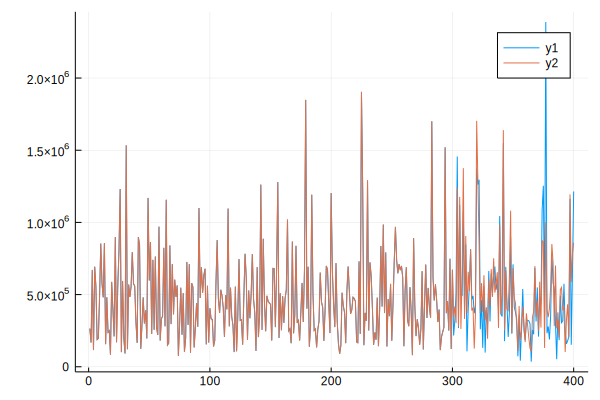

In [74]:
plot([μ,gdata_norm[:result]])

In [75]:
using DataFrames
df=DataFrame()
df.A =1:400
df.B =μ
CSV.write("y_predict_julia_geostats.csv",df, writeheader=false)

"y_predict_julia_geostats.csv"